In [709]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [710]:
df = pd.read_csv("apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


Understand Data set

In [711]:
df.shape

(4001, 9)

In [712]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [713]:
df.dropna(inplace=True)
df.shape

(4000, 9)

In [714]:
df.duplicated().sum()

0

In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [716]:
df.drop('A_id', inplace=True, axis=1)
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [717]:
df['Acidity'] = df['Acidity'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [718]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [719]:
df['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [720]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


EDA

Remove outliers

In [721]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

,count_out
Size,22
Weight,54
Sweetness,32
Crunchiness,47
Juiciness,32
Ripeness,24
Acidity,20
Quality,0


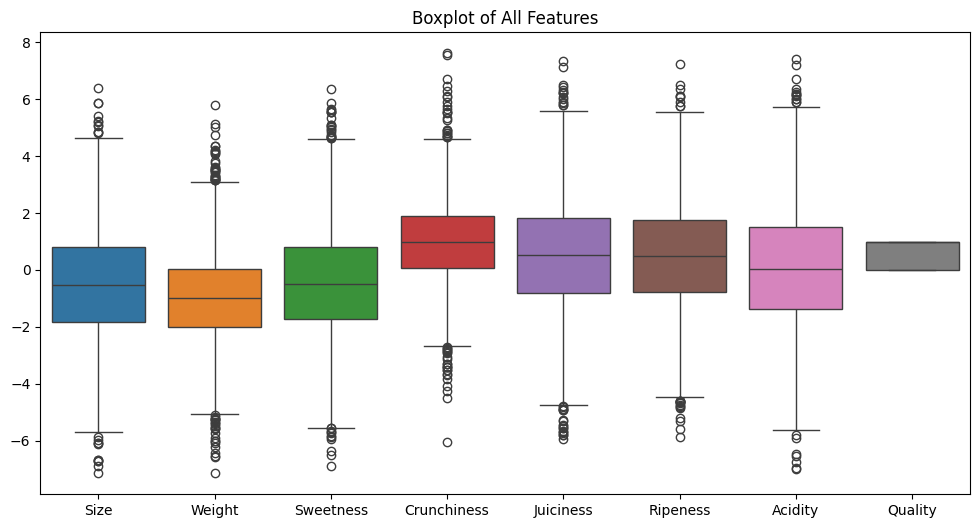

In [722]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of All Features")
plt.show()

In [723]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [ ]:
#rom scipy.stats.mstats import winsorize
#df['Sweetness'] = winsorize(df['Sweetness'], limits=[0.05, 0.05])  # Caps top/bottom 5%

In [724]:
df = df[(df['Crunchiness']<7) & (df['Crunchiness']>-5)]
df.shape

(3997, 8)

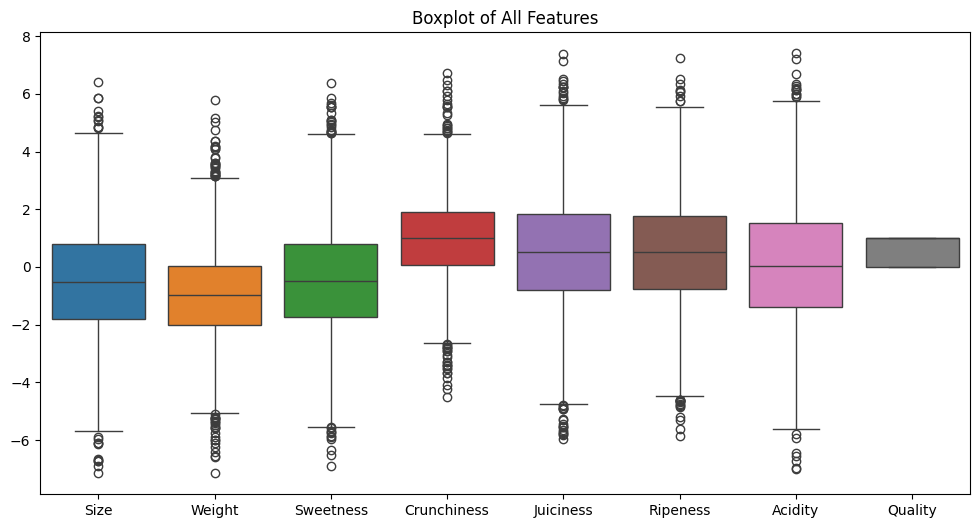

In [725]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of All Features")
plt.show()

try to find patterns

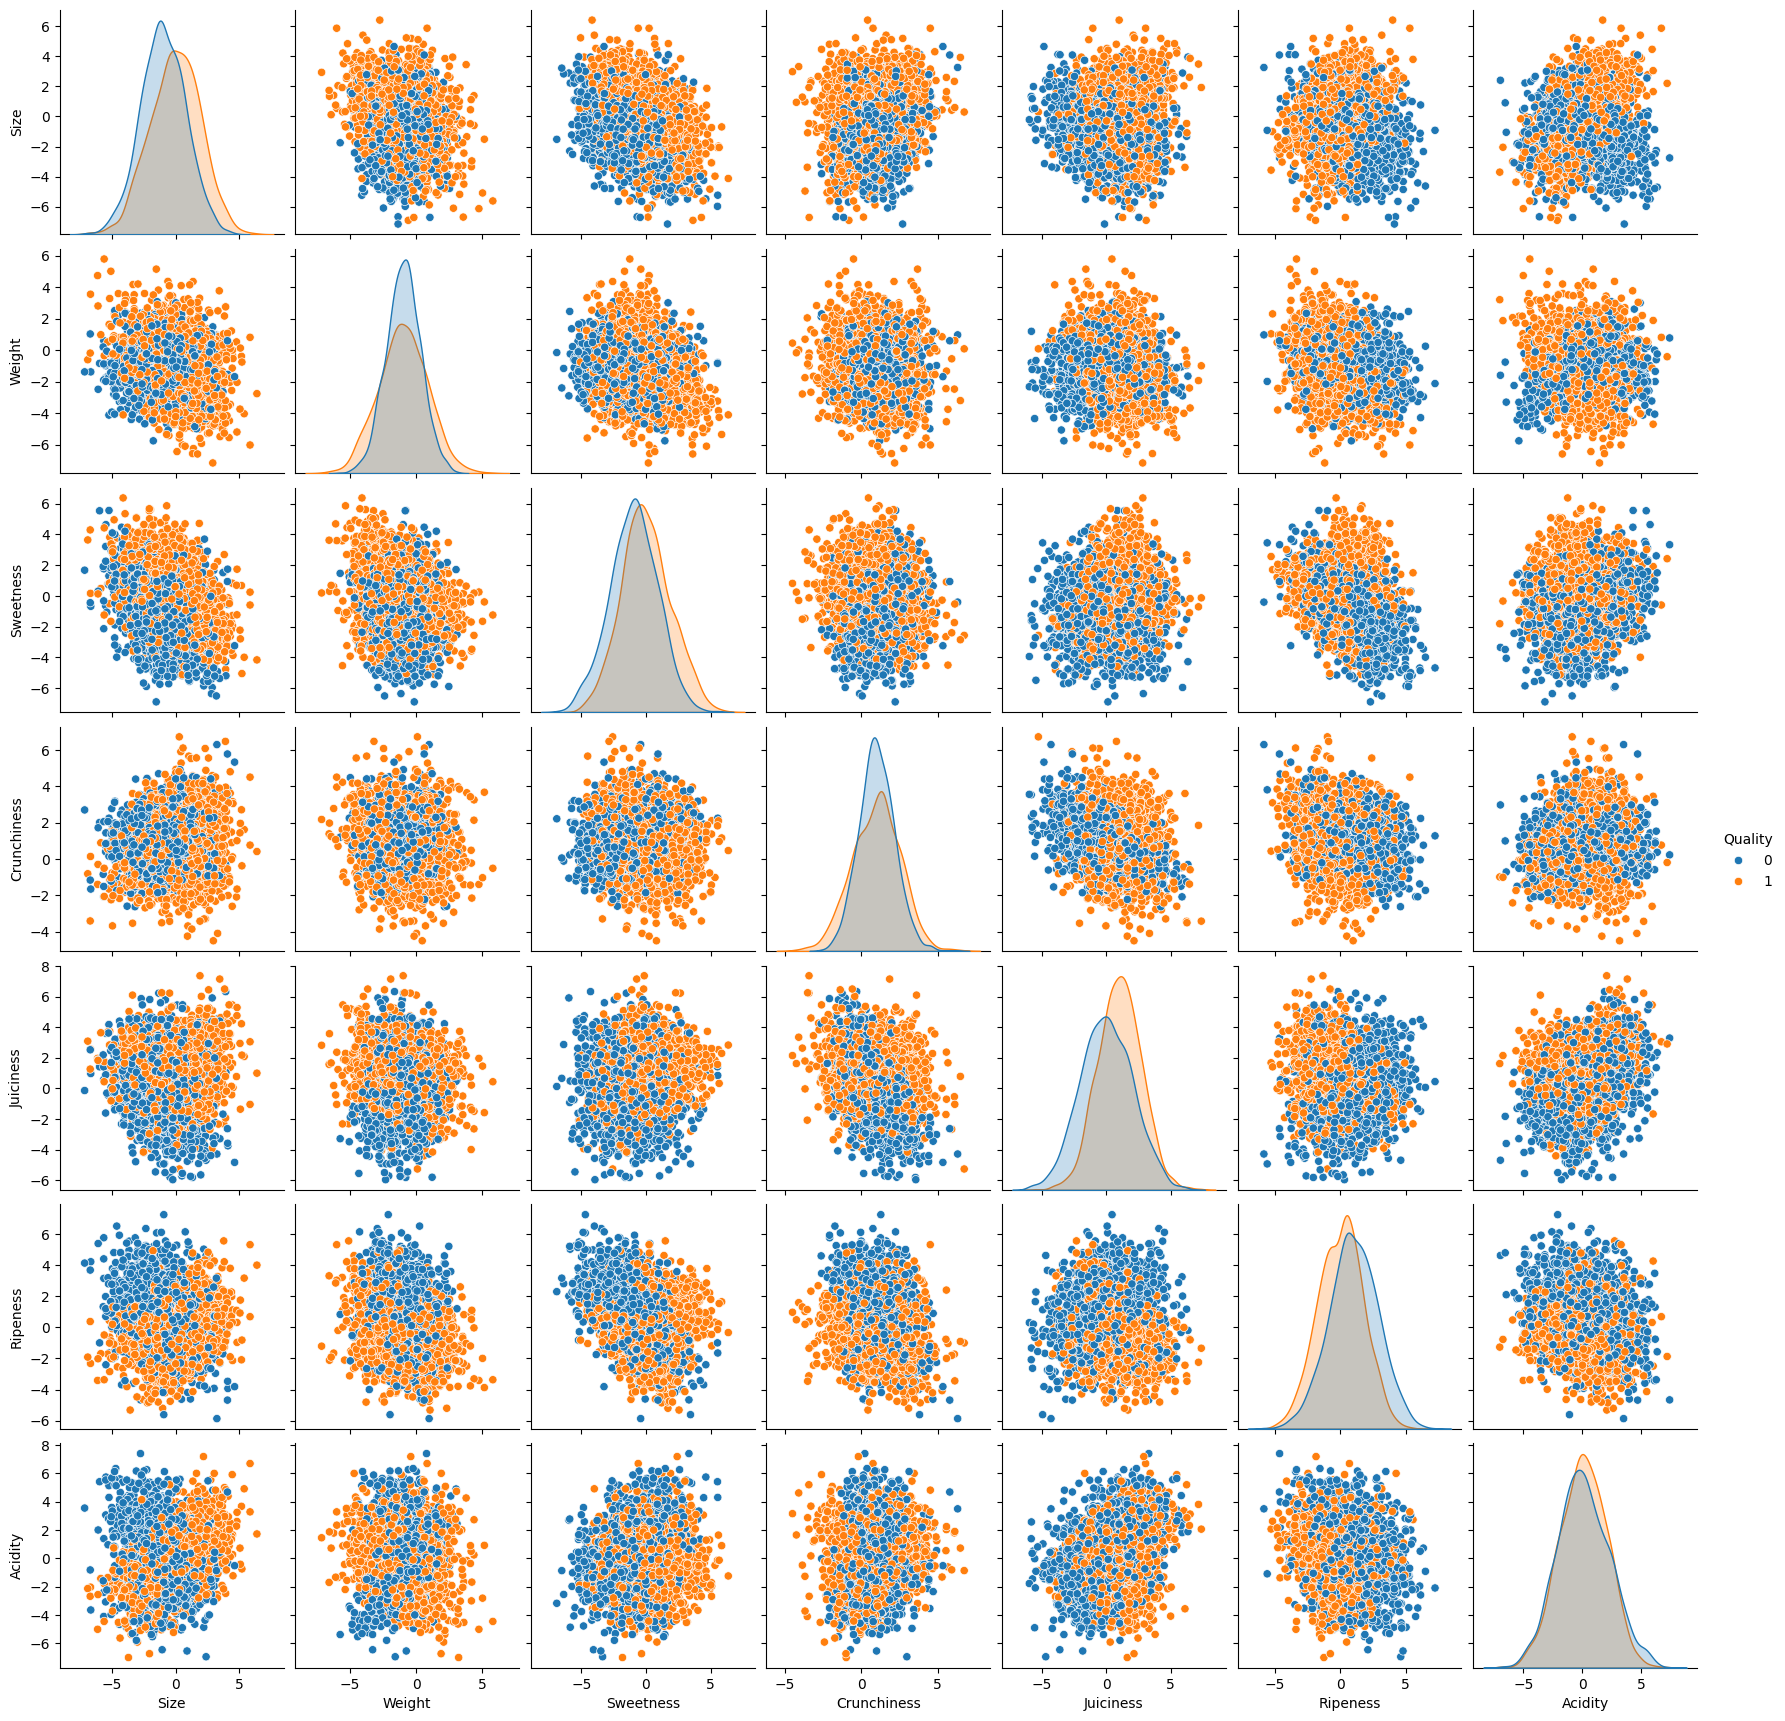

In [726]:
sns.pairplot(df, hue='Quality')
plt.show()

try to find relationships with eachothers

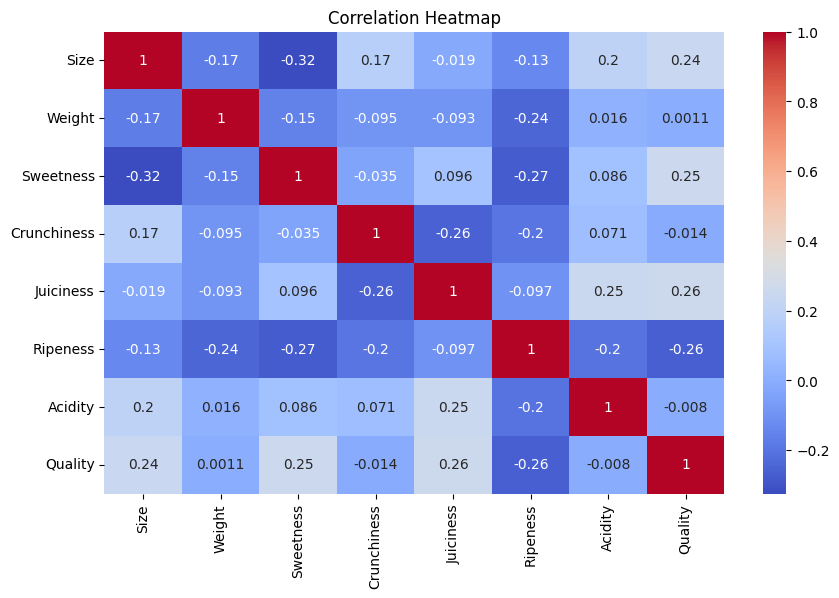

In [727]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Modeling

In [728]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [729]:
X = df.drop(['Quality'], axis=1) 
y = df['Quality']

In [730]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [731]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [732]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

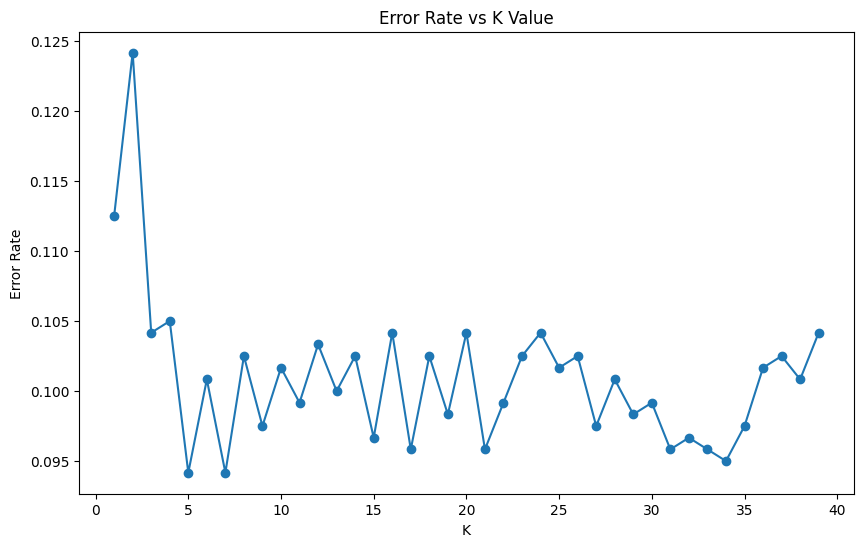

In [733]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [734]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate the Model

In [735]:
y_pred = knn.predict(X_test)

In [736]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[539  60]
 [ 53 548]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       599
           1       0.90      0.91      0.91       601

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200

Accuracy: 0.9058333333333334


In [737]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred_tuned = best_knn.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}
Tuned Accuracy: 0.9108333333333334


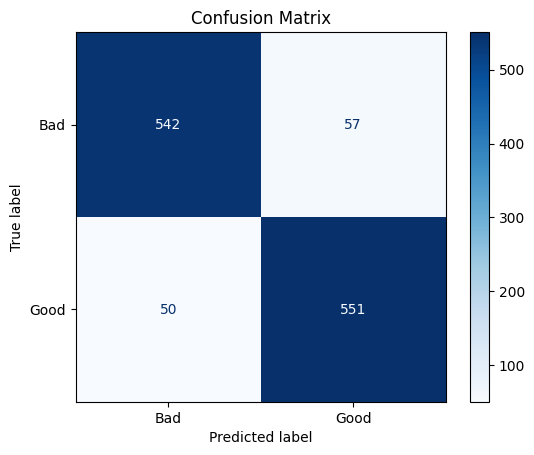

In [738]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test,
                                     display_labels=['Bad', 'Good'],
                                     cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Feature Importance


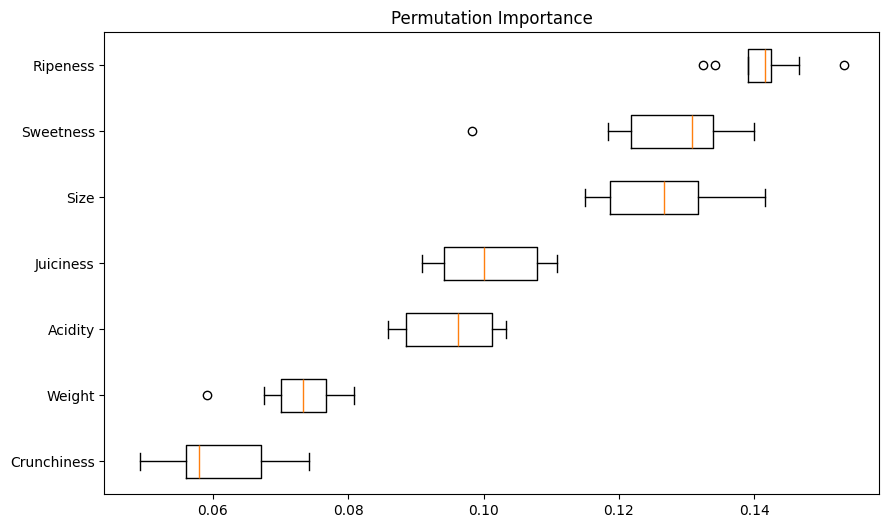

In [739]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False,
           labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Importance")
plt.show()

Predict a new data 

In [740]:

new_fruit = [[3.5, 150, 7.2, 6.8, 8.0, 7.5, 0.3]]  
new_fruit_scaled = scaler.transform(new_fruit)
prediction = best_knn.predict(new_fruit_scaled)
print("Predicted Quality:", prediction[0])

Predicted Quality: 1


d:\my web\python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Save the model

In [741]:
import joblib
joblib.dump(best_knn, 'fruit_quality_knn_model.pkl')  # Save model
joblib.dump(scaler, 'fruit_quality_scaler.pkl')  # Save scaler

['fruit_quality_scaler.pkl']